In [2]:
#Importar paquetes
import pandas as pd
import numpy as np
import sqlite3 as sql


In [5]:
import os  ### para ver y cambiar directorio de trabajo

In [6]:
os.getcwd()
os.chdir('C:\\Users\\ASUS\\Documents\\2022-1\\ANALÍTICA 3\\MARKETING_git')

In [7]:
###### para ejecutar sql y conectarse a bd ###

conn=sql.connect('db_movies')
cur=conn.cursor() ###para funciones que ejecutan sql en base de datos


In [8]:
def ejecutar_sql (nombre_archivo, cur):
    sql_file=open(nombre_archivo)
    sql_as_string=sql_file.read()
    sql_file.close
    cur.executescript(sql_as_string)

In [9]:
#######
############ cargar tablas ####

movies= pd.read_sql('select * from movies', conn)
ratings = pd.read_sql('select * from ratings', conn)

Tabla Movies

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
#Observar columnas de movies
print('Columnas:',movies.columns)
#Dimensiones de la base
print('Dimensiones:', movies.shape)

Columnas: Index(['movieId', 'title', 'genres'], dtype='object')
Dimensiones: (9742, 3)


In [12]:
#Conocer el tipo de variables
print(movies.dtypes)

movieId     int64
title      object
genres     object
dtype: object


In [13]:
#Información general
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Tabla Ratings

In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [16]:
#Observar columnas de movies
print('Columnas:',ratings.columns)
#Dimensiones de la base
print('Dimensiones:', ratings.shape)

Columnas: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Dimensiones: (100836, 4)


In [17]:
#Conocer el tipo de variables
print(ratings.dtypes)

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [18]:
from datetime import datetime
datetime.fromtimestamp(964982703)

datetime.datetime(2000, 7, 30, 13, 45, 3)

In [20]:
#Modificar formato de timestamp a datetime
from datetime import datetime
ratings['timestamp']= ratings.apply(lambda x: datetime.fromtimestamp(x['timestamp']), axis=1)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 13:45:03
1,1,3,4.0,2000-07-30 13:20:47
2,1,6,4.0,2000-07-30 13:37:04
3,1,47,5.0,2000-07-30 14:03:35
4,1,50,5.0,2000-07-30 13:48:51


Nueva base de datos

In [21]:
#Crear base de datos con la unión de las tablas de movies y ratings
movie_ratings = pd.merge(ratings,movies, how="left", right_on="movieId", left_on="movieId")
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 13:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 13:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 13:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 14:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 13:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [22]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
 4   title      100836 non-null  object        
 5   genres     100836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


In [23]:
#Verificar si hay datos duplicados 
movie_ratings.duplicated().sum()

0

In [24]:
#Observar columnas de la nueva base de datos
movie_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [25]:
genres = movies.copy()
genres = genres.drop(columns=['movieId', 'title'])
genres['genres'] = genres['genres'].str.split('|')
genres_dummies = pd.get_dummies(pd.DataFrame(genres['genres'].tolist()).stack()).sum(level=0)
genres = pd.concat([genres, genres_dummies], axis=1).drop(columns=['genres'])
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
movies2 = pd.concat([movies, genres], axis=1)
movies2 = movies2.drop(['genres'], axis=1)
movies2.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
movies3 = pd.melt(movies2, id_vars= ['movieId', 'title'])
print(movies3.columns)


Index(['movieId', 'title', 'variable', 'value'], dtype='object')


In [38]:
movies3.sample(10)

,movieId,title,variable,value
13660,5505,"Good Girl, The (2002)",Action,0
101813,6452,"Long, Hot Summer, The (1958)",Film-Noir,0
186925,2428,"Faculty, The (1998)",Western,0
60086,2180,Torn Curtain (1966),Crime,0
152632,53450,"Legend of Sleepy Hollow, The (1980)",Romance,0
92136,6582,Remo Williams: The Adventure Begins (1985),Fantasy,0
27342,93838,The Raid: Redemption (2011),Adventure,0
144807,110826,Brick Mansions (2014),Mystery,0
105024,86817,Something Borrowed (2011),Film-Noir,0
62771,6310,Memories of Me (1988),Crime,0


In [33]:
movies3.groupby('variable')[['value']].sum().reset_index()

,variable,value
0,(no genres listed),34.0
1,Action,1828.0
2,Adventure,1263.0
3,Animation,611.0
4,Children,664.0
5,Comedy,3756.0
6,Crime,1199.0
7,Documentary,440.0
8,Drama,4361.0
9,Fantasy,779.0


In [45]:
movie_ratings1 = pd.merge(ratings,movies2, how="left", right_on="movieId", left_on="movieId")


Anális Exploratorio

In [20]:
import plotly.graph_objs as go #Graficos
import plotly.express as px
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt ### gráficos

In [21]:
# crear dataset
base = movie_ratings.groupby(['title'])[['rating']].count().sort_values('rating', ascending = False).reset_index().head(10)

# crear gráfica
fig = px.bar(base, x = 'title', y='rating',
             title= '<b>Películas más calificadas<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Películas',
    yaxis_title = 'Calificación',
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [ ]:
# ARREGLAR
# crear dataset
base = movies3.groupby(['variable'])[['value']].sum().sort_values('value', ascending = False).reset_index()

# crear gráfica
fig = px.pie(base, values = 'value', names ='variable',
             title= '<b>Participación por barrio en el valor de los edificios vendidos<b>',
             color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles a la gráfica
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5)

fig.show()

In [48]:
final_dataset = movie_ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset = final_dataset.fillna(0)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#saber cuantas calificaciones tiene cada pelicula
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
#saber cuantas veces han calificado cada película
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')


2698

In [56]:
print(no_movies_voted.max())
print(no_movies_voted.min())

2698
20


In [58]:
print(no_user_voted.min())
print(no_user_voted.max())

1
329


<AxesSubplot:title={'center':'Ratings per user'}, ylabel='Ratings'>

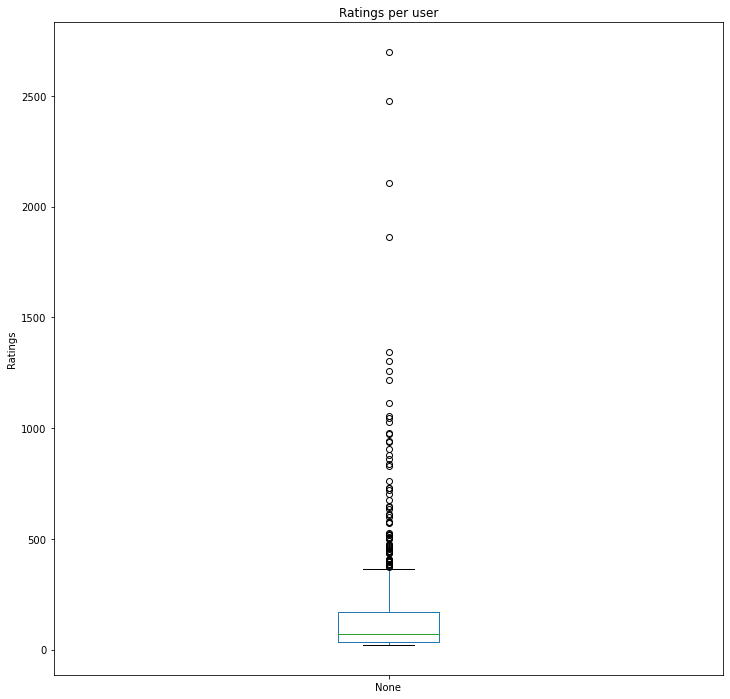

In [59]:
rated_movies_by_user = ratings.groupby("userId").size().sort_values(ascending=False)
rated_movies_by_user.plot.box(figsize=(12,12), ylabel="Ratings", title='Ratings por usuario')

In [67]:
#promedio de calificaciones por usuario
rated_movies_by_user = ratings.groupby("userId").size().count()
rated_movies_by_user

610